# Implement a Multi-armed Bandit Algorithm

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def init_bandit(n):
    """
    Initializes a multi-armed bandit problem with `n` arms.

    Args:
        n (int): The number of arms in the bandit problem.

    Returns:
        q_star (ndarray): The true mean reward for each arm.
        Q (ndarray): The agent's estimated mean reward for each arm.
        N (ndarray): The number of times each arm has been chosen.
    """
    # Initialising true mean reward for each arm
    q_star = np.random.normal(size=n)
    
    # Initialising agent's estimated mean reward for each arm
    Q = np.zeros(n)
    
    # Initialising number of times each arm has been chosen
    N = np.zeros(n)
    
    # returning the initial values of the true mean reward, the estimated reward and the number of times each arm is selected
    return q_star, Q, N

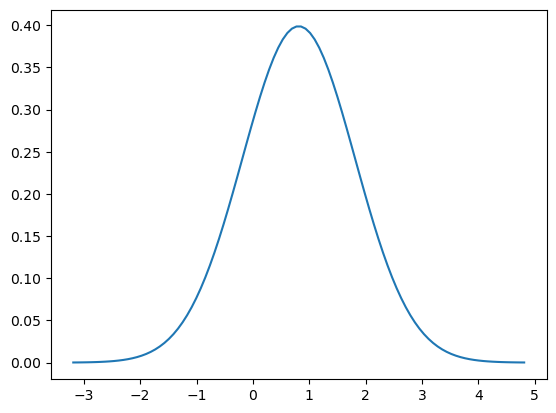

In [3]:
# Initialize bandit problem with 5 arms
q_star, _, _ = init_bandit(8)

# Plot normal distributions centered at true mean rewards for first arm
x = np.linspace(q_star[0]-4, q_star[0]+4, 100)
y = 1/(np.sqrt(2*np.pi))*np.exp(-0.5*(x-q_star[0])**2)
plt.plot(x, y)

# Show plot
plt.show()

In [4]:
def select_action(Q, epsilon):
    """
    Selects an action for the agent to take based on its current estimates of the mean rewards for each arm (`Q`).

    Args:
        Q (ndarray): The agent's estimated mean reward for each arm.
        epsilon (float): The degree of exploration vs. exploitation.

    Returns:
        action (int): The index of the arm to choose.
    """
    
    
    if np.random.rand() < epsilon:
        
        # Explore: choose a random action
        action = np.random.randint(len(Q))
        
    else:
        # Exploit: choose the action with highest estimate
        maxQ = np.max(Q)
        
        # If there is a tie for the highest estimate, chooses randomly among the tied arms.
        best = np.where(Q == maxQ)[0]
        if len(best) > 1:
            action = np.random.choice(best)
        else:
            action = best[0]
    return action

In [5]:
def run_bandit(n, num_steps, epsilon):
    """
    Runs a multi-armed bandit problem for `num_steps` time steps with `n` arms and a given value of `epsilon`.

    Args:
        n (int): The number of arms in the bandit problem.
        num_steps (int): The number of time steps to run the bandit problem.
        epsilon (float): The degree of exploration vs. exploitation.

    Returns:
        rewards (ndarray): The rewards received at each time step.
        optimal (ndarray): Whether each chosen arm was optimal (i.e., had the highest true mean reward) at each time step.
    """
    q_star, Q, N = init_bandit(n)
    rewards = np.zeros(num_steps)
    optimal = np.zeros(num_steps)

    for i in range(num_steps):
        action = select_action(Q, epsilon)
        reward = np.random.normal(q_star[action], 1)
        rewards[i] = reward
        N[action] += 1
        Q[action] += (reward - Q[action]) / N[action]

        if action == np.argmax(q_star):
            optimal[i] = 1

    return rewards, optimal

In [6]:
n = np.random.choice([8, 10])
num_steps = 1000
epsilons = [0.1, 0.01, 0]
num_runs = 2000

avg_rewards = np.zeros((len(epsilons), num_steps))
avg_optimal = np.zeros((len(epsilons), num_steps))
for i in range(num_runs):
    for j, epsilon in enumerate(epsilons):
        rewards, optimal = run_bandit(n, num_steps, epsilon)
        avg_rewards[j] += (rewards - avg_rewards[j]) / (i + 1)
        avg_optimal[j] += (optimal - avg_optimal[j]) / (i + 1)

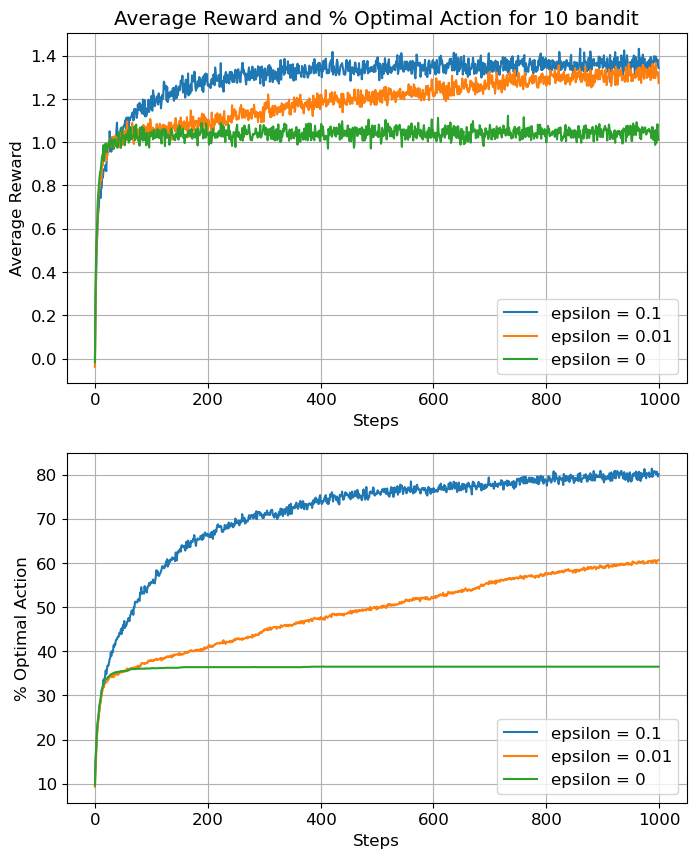

In [7]:
# set the font size
plt.rcParams.update({'font.size': 12})

# create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# plot the average reward in the top subplot
axs[0].set_title(f"Average Reward and % Optimal Action for {n} bandit")
axs[0].grid(True)
for i, epsilon in enumerate(epsilons):
    axs[0].plot(avg_rewards[i], label="epsilon = {}".format(epsilon))
axs[0].set_xlabel("Steps")
axs[0].set_ylabel("Average Reward")
axs[0].legend(loc="lower right")

# plot the % optimal action in the bottom subplot
axs[1].grid(True)
for i, epsilon in enumerate(epsilons):
    axs[1].plot(avg_optimal[i] * 100, label="epsilon = {}".format(epsilon))
axs[1].set_xlabel("Steps")
axs[1].set_ylabel("% Optimal Action")
axs[1].legend(loc="lower right")

# use a color map to distinguish between the lines in the plot
plt.set_cmap('tab10')

# display the plot
plt.show()